In [1]:
import pandas as pd
from unidecode import unidecode

In [2]:
import sys
sys.path.append(r"../machine-learning-models/")

In [3]:
import SVM.SVM as SVM

In [4]:
dfData = pd.read_csv(r"../data-from-SEMISH/dataSEMISH.csv")

In [5]:
svc = SVM.SVM(path=r"../machine-learning-models/SVM/Models/")

In [6]:
dfData["SVM"] = svc.classify([unidecode(name) for name in dfData["Primeiro Nome"]])
dfData.sort_values("Ano", inplace=True)
dfData

,Ano,Autor,Primeiro Nome,Titulos,SVM
333,2018,Leonardo Cunha de Miranda,Leonardo,Sustentabilidade de Foto-memórias na Era Digit...,M
309,2018,Gabriel Oliveira Ferreira,Gabriel,"Controladores, tratamento de sinais e programa...",M
308,2018,Ricardo Reis,Ricardo,Estratégias para a Redução de Consumo de Energ...,M
307,2018,Paulo F. Pires,Paulo,Classifying Smart IoT Devices for Running Mach...,M
306,2018,Flávia C. Delicato,Flávia,Classifying Smart IoT Devices for Running Mach...,F
...,...,...,...,...,...
89,2021,Larissa Mukuno,Larissa,Aplicando modelo de aprendizagem supervisionad...,F
88,2021,Renato Hidaka Torres,Renato,Análise de sentimento com rede neural convoluc...,M
87,2021,Orlando Shigueo Ohashi Junior,Orlando,Análise de sentimento com rede neural convoluc...,M
93,2021,Edleno Silva de Moura,Edleno,Jusbrasil e os Desafios Tecnológicos para Faci...,M


In [7]:
data = dict()
F = 0
M = 0
ant = 2018
for ano, classi in zip(dfData["Ano"], dfData["SVM"]):
    if ant != ano and ant != 0:
        data[ant] = [F, M]
        F, M = 0, 0
        ant = ano
    if classi == "F":
        F += 1
    if classi == "M":
        M += 1
data[ant] = [F, M]
print(data)

{2018: [10, 31], 2019: [10, 55], 2020: [25, 68], 2021: [30, 105]}


In [8]:
dftmp = pd.DataFrame()
dftmp["Ano"] = [x for x in data]
dftmp["F"] = [data[x][0] for x in data]
dftmp["M"] = [data[x][1] for x in data]
dftmp.set_index("Ano", inplace=True)

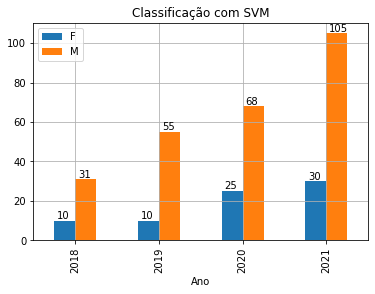

In [9]:
ax = dftmp.plot(kind="bar", grid=True)
ax.set_title('Classificação com SVM')
x_offset = -0.09
y_offset = 1.0
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.0f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))

<AxesSubplot:title={'center':'Classificação com SVM'}, xlabel='Ano'>

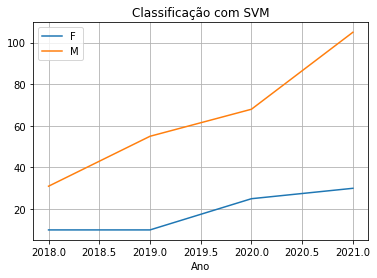

In [10]:
dftmp.plot.line(grid=True, title="Classificação com SVM")